In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

import warnings
warnings.filterwarnings('ignore')

In [320]:
Data = pd.read_csv('Oxford_Data.csv')
Data

,yyyy,mm,tmax,tmin,af,rain,sun
0,NaN,NaN,degC,degC,days,mm,hours
1,1853.0,1.0,8.4,2.7,4,62.8,---
2,1853.0,2.0,3.2,-1.8,19,29.3,---
3,1853.0,3.0,7.7,-0.6,20,25.9,---
4,1853.0,4.0,12.6,4.5,0,60.1,---
...,...,...,...,...,...,...,...
2043,2023.0,3.0,10.6,4.5,3 1,4.9,65.9 Provisional
2044,2023.0,4.0,13.7,5.1,1,65.9,154.7 Provisional
2045,2023.0,5.0,18.3,* 8.4,0,51.2,221.5 Provisional
2046,2023.0,6.0,23.8,12.1,0,40.5,226.1 Provisional


In [321]:
# Remove columns sun'
columns_to_remove = ['sun']
Data = Data.drop(columns=columns_to_remove)

In [322]:
Data.dtypes

yyyy    float64
mm      float64
tmax     object
tmin     object
af       object
rain     object
dtype: object

In [323]:
Data['yyyy'] = pd.to_numeric(Data['yyyy'], errors='coerce').astype('Int64')
Data['mm'] = pd.to_numeric(Data['mm'], errors='coerce').astype('Int64')
Data['tmax'] = pd.to_numeric(Data['tmax'], errors='coerce')
Data['tmin'] = pd.to_numeric(Data['tmin'], errors='coerce')
Data['af'] = pd.to_numeric(Data['af'], errors='coerce')
Data['rain'] = pd.to_numeric(Data['rain'], errors='coerce')

In [324]:
Data.dtypes

yyyy      Int64
mm        Int64
tmax    float64
tmin    float64
af      float64
rain    float64
dtype: object

In [325]:
Data = Data.drop(index = Data.index[0])

In [326]:
Data.apply(pd.isnull).sum() # missing values

yyyy      0
mm        0
tmax      0
tmin     12
af      183
rain      0
dtype: int64

In [327]:
Data["tmin"].fillna( method ='ffill', inplace = True)
Data["af"].fillna( method ='ffill', inplace = True)

In [328]:
Data.apply(pd.isnull).sum() # missing values

yyyy    0
mm      0
tmax    0
tmin    0
af      0
rain    0
dtype: int64

In [329]:
Data['tavg'] = (Data['tmax']+Data['tmin'])/2
# Data['location'] = 'Oxford'

In [330]:
Data

,yyyy,mm,tmax,tmin,af,rain,tavg
1,1853,1,8.4,2.7,4.0,62.8,5.55
2,1853,2,3.2,-1.8,19.0,29.3,0.70
3,1853,3,7.7,-0.6,20.0,25.9,3.55
4,1853,4,12.6,4.5,0.0,60.1,8.55
5,1853,5,16.8,6.1,0.0,59.5,11.45
...,...,...,...,...,...,...,...
2043,2023,3,10.6,4.5,9.0,4.9,7.55
2044,2023,4,13.7,5.1,1.0,65.9,9.40
2045,2023,5,18.3,5.1,0.0,51.2,11.70
2046,2023,6,23.8,12.1,0.0,40.5,17.95


In [331]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 1 to 2047
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    2047 non-null   Int64  
 1   mm      2047 non-null   Int64  
 2   tmax    2047 non-null   float64
 3   tmin    2047 non-null   float64
 4   af      2047 non-null   float64
 5   rain    2047 non-null   float64
 6   tavg    2047 non-null   float64
dtypes: Int64(2), float64(5)
memory usage: 116.1 KB
None


In [332]:
print(Data.describe())

              yyyy           mm         tmax         tmin           af  \
count  2047.000000  2047.000000  2047.000000  2047.000000  2047.000000   
mean   1937.792379     6.491451    13.981583     6.230093     3.763068   
std      49.255586     3.452060     5.700771     4.213745     5.353217   
min    1853.000000     1.000000    -0.200000    -5.800000     0.000000   
25%    1895.000000     3.000000     9.000000     2.800000     0.000000   
50%    1938.000000     6.000000    13.800000     5.600000     1.000000   
75%    1980.000000     9.000000    19.100000    10.200000     6.000000   
max    2023.000000    12.000000    27.400000    15.700000    28.000000   

              rain         tavg  
count  2047.000000  2047.000000  
mean     46.154763    10.105838  
std      24.957228     4.908680  
min       0.000000    -3.000000  
25%      26.100000     6.000000  
50%      44.200000     9.700000  
75%      64.250000    14.650000  
max      99.900000    21.100000  


# EDA

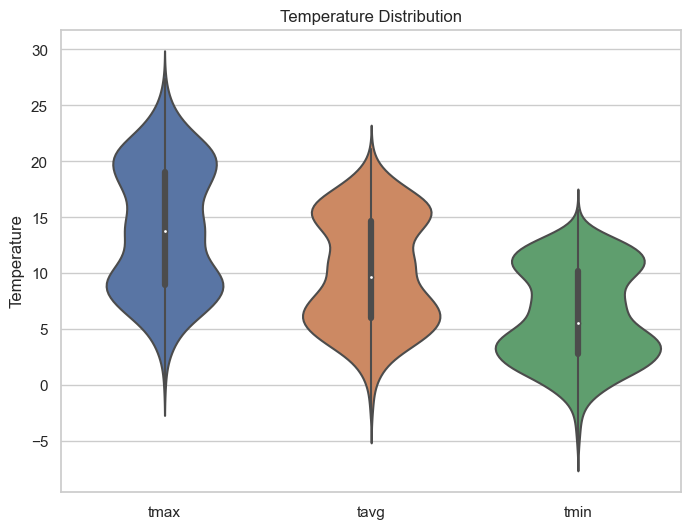

In [371]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a violin plot of temperature distribution
plt.figure(figsize=(8, 6))

sns.violinplot(data=Data[['tmax', 'tavg', 'tmin']])
plt.ylabel('Temperature')
plt.title('Temperature Distribution')

plt.show()

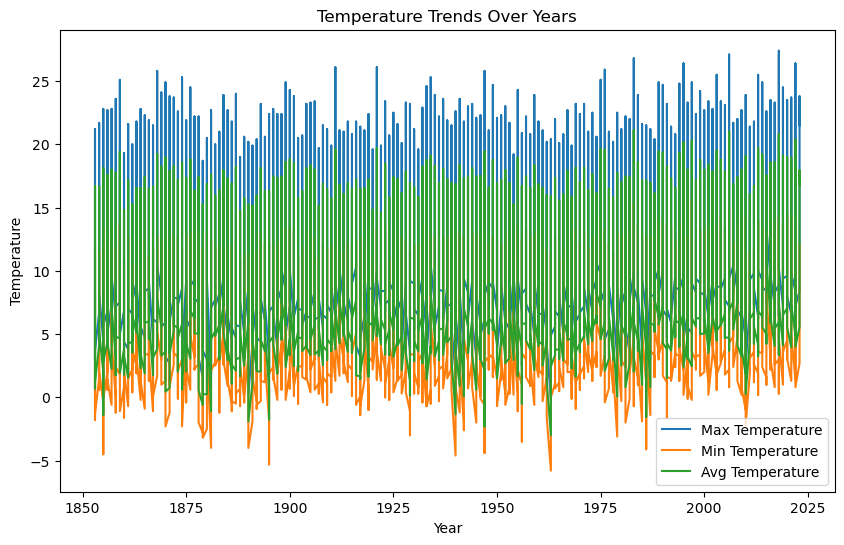

In [334]:
# Plotting temperature data over months
plt.style.use('default')
plt.figure(figsize=(10, 6))

plt.plot(Data['yyyy'], Data['tmax'], label='Max Temperature')
plt.plot(Data['yyyy'], Data['tmin'], label='Min Temperature')
plt.plot(Data['yyyy'], Data['tavg'], label='Avg Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trends Over Years')
plt.legend()

plt.show()

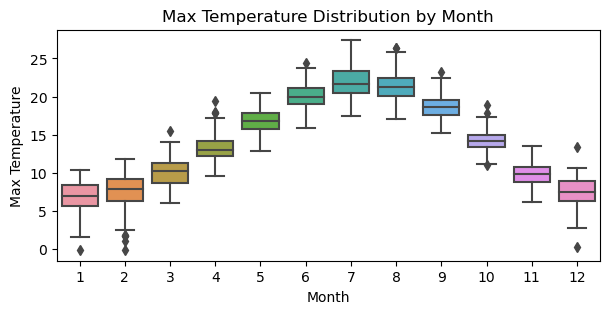

In [335]:
# Box plot
fig, ax = plt.subplots(figsize=(7, 3))
box_plot_Df = sns.boxplot(x=Data['mm'], y=Data['tmax'], ax=ax)

# Label the axes and add title
ax.set_xlabel('Month')
ax.set_ylabel('Max Temperature')
ax.set_title('Max Temperature Distribution by Month')

plt.show()


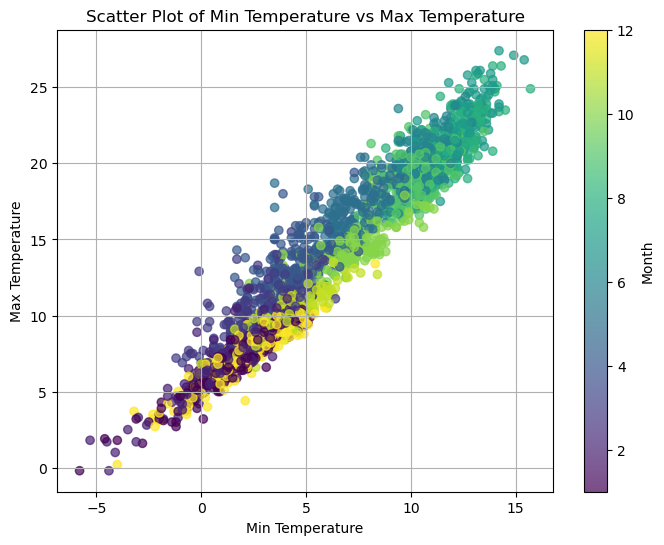

In [336]:
# Scatter plot of max and min temperatures

plt.figure(figsize=(8, 6))
plt.scatter(Data['tmin'], Data['tmax'], c=Data['mm'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Month')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.title('Scatter Plot of Min Temperature vs Max Temperature')
plt.grid(True)

plt.show()

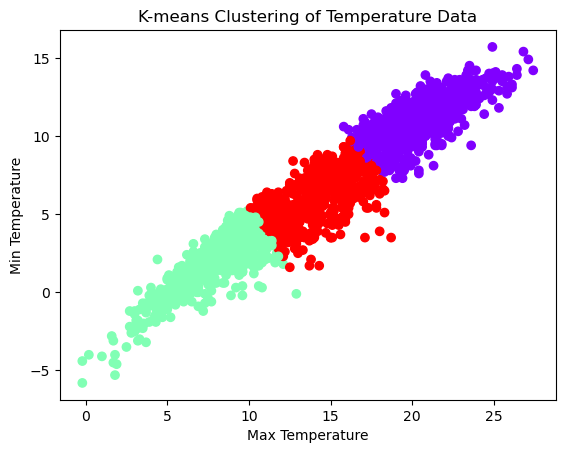

In [337]:
from sklearn.cluster import KMeans

# Select relevant columns for clustering
X = Data[['tmax', 'tmin']]

# Specify the number of clusters (you need to determine this based on your problem)
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
Data['cluster_label'] = kmeans.labels_

# Plot the clusters
plt.scatter(Data['tmax'], Data['tmin'], c=Data['cluster_label'], cmap='rainbow')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.title('K-means Clustering of Temperature Data')
plt.show()

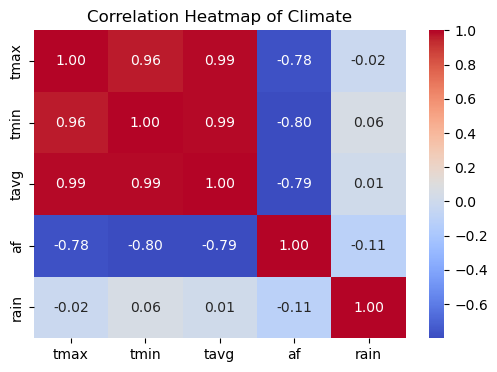

In [338]:
# Select relevant columns for correlation analysis
selected_columns = ['tmax', 'tmin', 'tavg', 'af', 'rain']
correlation_matrix = Data[selected_columns].corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap of Climate')
# Display the heatmap
plt.show()

In [339]:
X = Data.drop(columns=['tmax','yyyy','mm','tavg','cluster_label'])
y = Data['tmax']

In [340]:
print("Feature Variables (X):")
print(X.head())

Feature Variables (X):
   tmin    af  rain
1   2.7   4.0  62.8
2  -1.8  19.0  29.3
3  -0.6  20.0  25.9
4   4.5   0.0  60.1
5   6.1   0.0  59.5


In [341]:
y.head()

1     8.4
2     3.2
3     7.7
4    12.6
5    16.8
Name: tmax, dtype: float64

In [342]:
# Define the splitting condition 
split_condition = 2000

# Select the rows where the 'yyyy' column meets the condition for training
X_train = X[Data['yyyy'] <= split_condition]
y_train = y[Data['yyyy']<= split_condition]

# For test data, select the rows where the 'yyyy' column is greater than 2000
X_test = X[Data['yyyy'] > split_condition]
y_test = y[Data['yyyy']> split_condition]


In [343]:
# Print sample data from both sets
print("Train Data:")
print(train)

print("\nTest Data:")
print(test)

Train Data:
1       1853
2       1853
3       1853
4       1853
5       1853
        ... 
1772    2000
1773    2000
1774    2000
1775    2000
1776    2000
Name: yyyy, Length: 1776, dtype: Int64

Test Data:
1777    2001
1778    2001
1779    2001
1780    2001
1781    2001
        ... 
2043    2023
2044    2023
2045    2023
2046    2023
2047    2023
Name: yyyy, Length: 271, dtype: Int64


In [344]:
# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1776, 3)
X_test shape: (271, 3)
y_train shape: (1776,)
y_test shape: (271,)


In [345]:
from sklearn.metrics import mean_squared_error
y_pred = [y_train.mean()] * len(y_train)
print("Baseline MAE: ", round(mean_squared_error(y_train, y_pred), 5))

Baseline MAE:  32.29578


Model Comparison

In [346]:
# Define the models
models = {
    'RF Regressor': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'GBoost Regressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'CatBoost Regressor': CatBoostRegressor(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
}

# You can proceed with fitting and evaluating these models using your data

model_r2_score = {}  # Initialize an empty dictionary to store R-squared scores

for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_r2_score[model_name] = model.score(X_test, y_test)

Learning rate set to 0.044832
0:	learn: 5.4717937	total: 1.63ms	remaining: 1.63s
1:	learn: 5.2623264	total: 2.69ms	remaining: 1.34s
2:	learn: 5.0684029	total: 3.24ms	remaining: 1.08s
3:	learn: 4.8810916	total: 4.34ms	remaining: 1.08s
4:	learn: 4.7011666	total: 5.47ms	remaining: 1.09s
5:	learn: 4.5292151	total: 6.51ms	remaining: 1.08s
6:	learn: 4.3658727	total: 7.47ms	remaining: 1.06s
7:	learn: 4.2106198	total: 8.58ms	remaining: 1.06s
8:	learn: 4.0585083	total: 9.79ms	remaining: 1.08s
9:	learn: 3.9156563	total: 10.9ms	remaining: 1.08s
10:	learn: 3.7809546	total: 12.1ms	remaining: 1.08s
11:	learn: 3.6526985	total: 13ms	remaining: 1.07s
12:	learn: 3.5323038	total: 14.4ms	remaining: 1.09s
13:	learn: 3.4190284	total: 15.4ms	remaining: 1.08s
14:	learn: 3.3072419	total: 16.5ms	remaining: 1.08s
15:	learn: 3.2041621	total: 17.6ms	remaining: 1.08s
16:	learn: 3.1050894	total: 18.8ms	remaining: 1.08s
17:	learn: 3.0097491	total: 19.8ms	remaining: 1.08s
18:	learn: 2.9229858	total: 20.7ms	remaining: 

164:	learn: 1.4280503	total: 189ms	remaining: 958ms
165:	learn: 1.4274533	total: 191ms	remaining: 958ms
166:	learn: 1.4267578	total: 192ms	remaining: 957ms
167:	learn: 1.4263711	total: 193ms	remaining: 956ms
168:	learn: 1.4256779	total: 194ms	remaining: 955ms
169:	learn: 1.4250282	total: 196ms	remaining: 955ms
170:	learn: 1.4243883	total: 197ms	remaining: 954ms
171:	learn: 1.4237506	total: 198ms	remaining: 954ms
172:	learn: 1.4231810	total: 199ms	remaining: 953ms
173:	learn: 1.4226886	total: 201ms	remaining: 953ms
174:	learn: 1.4219420	total: 202ms	remaining: 952ms
175:	learn: 1.4215455	total: 203ms	remaining: 952ms
176:	learn: 1.4206714	total: 205ms	remaining: 952ms
177:	learn: 1.4198308	total: 206ms	remaining: 952ms
178:	learn: 1.4192563	total: 208ms	remaining: 952ms
179:	learn: 1.4190985	total: 209ms	remaining: 952ms
180:	learn: 1.4188413	total: 210ms	remaining: 951ms
181:	learn: 1.4182588	total: 211ms	remaining: 950ms
182:	learn: 1.4180102	total: 213ms	remaining: 951ms
183:	learn: 

459:	learn: 1.2788902	total: 560ms	remaining: 657ms
460:	learn: 1.2784721	total: 561ms	remaining: 656ms
461:	learn: 1.2781019	total: 562ms	remaining: 654ms
462:	learn: 1.2776432	total: 563ms	remaining: 653ms
463:	learn: 1.2772980	total: 564ms	remaining: 652ms
464:	learn: 1.2771745	total: 565ms	remaining: 651ms
465:	learn: 1.2770518	total: 567ms	remaining: 649ms
466:	learn: 1.2769287	total: 568ms	remaining: 648ms
467:	learn: 1.2767599	total: 569ms	remaining: 647ms
468:	learn: 1.2763625	total: 570ms	remaining: 646ms
469:	learn: 1.2757901	total: 571ms	remaining: 644ms
470:	learn: 1.2752596	total: 573ms	remaining: 643ms
471:	learn: 1.2752427	total: 574ms	remaining: 642ms
472:	learn: 1.2750874	total: 575ms	remaining: 640ms
473:	learn: 1.2748675	total: 576ms	remaining: 639ms
474:	learn: 1.2745263	total: 578ms	remaining: 638ms
475:	learn: 1.2741758	total: 579ms	remaining: 637ms
476:	learn: 1.2736912	total: 580ms	remaining: 636ms
477:	learn: 1.2735665	total: 581ms	remaining: 635ms
478:	learn: 

774:	learn: 1.1783125	total: 935ms	remaining: 271ms
775:	learn: 1.1778160	total: 936ms	remaining: 270ms
776:	learn: 1.1775127	total: 937ms	remaining: 269ms
777:	learn: 1.1773718	total: 939ms	remaining: 268ms
778:	learn: 1.1772183	total: 940ms	remaining: 267ms
779:	learn: 1.1771533	total: 941ms	remaining: 265ms
780:	learn: 1.1769611	total: 942ms	remaining: 264ms
781:	learn: 1.1769536	total: 943ms	remaining: 263ms
782:	learn: 1.1765837	total: 944ms	remaining: 262ms
783:	learn: 1.1760322	total: 945ms	remaining: 260ms
784:	learn: 1.1755984	total: 947ms	remaining: 259ms
785:	learn: 1.1754222	total: 948ms	remaining: 258ms
786:	learn: 1.1748598	total: 949ms	remaining: 257ms
787:	learn: 1.1743521	total: 950ms	remaining: 256ms
788:	learn: 1.1743360	total: 952ms	remaining: 254ms
789:	learn: 1.1738891	total: 953ms	remaining: 253ms
790:	learn: 1.1738768	total: 954ms	remaining: 252ms
791:	learn: 1.1738415	total: 955ms	remaining: 251ms
792:	learn: 1.1733633	total: 956ms	remaining: 250ms
793:	learn: 

935:	learn: 1.1372402	total: 1.13s	remaining: 77ms
936:	learn: 1.1370498	total: 1.13s	remaining: 75.8ms
937:	learn: 1.1367589	total: 1.13s	remaining: 74.6ms
938:	learn: 1.1365412	total: 1.13s	remaining: 73.4ms
939:	learn: 1.1363795	total: 1.13s	remaining: 72.2ms
940:	learn: 1.1359602	total: 1.13s	remaining: 71ms
941:	learn: 1.1356485	total: 1.13s	remaining: 69.8ms
942:	learn: 1.1353866	total: 1.13s	remaining: 68.6ms
943:	learn: 1.1352085	total: 1.14s	remaining: 67.4ms
944:	learn: 1.1350738	total: 1.14s	remaining: 66.2ms
945:	learn: 1.1348362	total: 1.14s	remaining: 65ms
946:	learn: 1.1346735	total: 1.14s	remaining: 63.8ms
947:	learn: 1.1344113	total: 1.14s	remaining: 62.6ms
948:	learn: 1.1342726	total: 1.14s	remaining: 61.4ms
949:	learn: 1.1337720	total: 1.14s	remaining: 60.2ms
950:	learn: 1.1335162	total: 1.15s	remaining: 59.1ms
951:	learn: 1.1332004	total: 1.15s	remaining: 57.9ms
952:	learn: 1.1328658	total: 1.15s	remaining: 56.7ms
953:	learn: 1.1327247	total: 1.15s	remaining: 55.5ms

In [347]:
model_comparison = pd.DataFrame({'model': model_r2_score.keys(), 'R-squared': model_r2_score.values()})
print(model_comparison)

                model  R-squared
0        RF Regressor   0.887509
1   Linear Regression   0.906005
2          ElasticNet   0.906006
3    GBoost Regressor   0.901343
4                 SVR   0.888326
5  CatBoost Regressor   0.895389
6    Lasso Regression   0.905033
7    Ridge Regression   0.906010


# RandomForestRegressor

In [348]:
# Fit and predict for a specific model (e.g., RandomForestRegressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [349]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for random search
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestRegressor
rs_rf = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [350]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [351]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9012216563845549

# ElasticNet Model

In [352]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

# Load your data and split into X_train, X_test, y_train, y_test

# Define the hyperparameter grid for random search
en_grid = {
    "alpha": np.logspace(-4, 4, 100),  # Range of alpha values
    "l1_ratio": np.linspace(0, 1, 100),  # Range of l1_ratio values
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for ElasticNet
rs_en = RandomizedSearchCV(
    ElasticNet(),
    param_distributions=en_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit random hyperparameter search model
rs_en.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=20,
                   param_distributions={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2....
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   verbose=True)

In [353]:
rs_en.best_params_

{'l1_ratio': 0.8585858585858587, 'alpha': 0.04641588833612782}

In [354]:
rs_en.score(X_test, y_test)

0.9060922983455291

In [355]:
import time
# Measure running time for the ElasticNet
start_time = time.time()
rs_en.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("ElasticNet took {:.2f} seconds.".format(elapsed_time))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ElasticNet took 0.21 seconds.


In [356]:
# Measure running time for the RandomizedSearchCV for RandomForestRegressor
start_time = time.time()
rs_rf.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("RandomizedSearchCV for RandomForestRegressor took {:.2f} seconds.".format(elapsed_time))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV for RandomForestRegressor took 69.48 seconds.


# Lasso Model

In [357]:

# Define the hyperparameter grid for random search (for Lasso)
lasso_grid = {
    "alpha": np.logspace(-4, 4, 100),
}

# Setup random hyperparameter search for Lasso
rs_lasso = RandomizedSearchCV(
    Lasso(),
    param_distributions=lasso_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit random hyperparameter search model for Lasso
rs_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=20,
                   param_distributions={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
                   verbose=True)

In [358]:
rs_lasso.best_params_

{'alpha': 0.055908101825122285}

In [359]:
rs_lasso.score(X_test, y_test)

0.9060526962704427

In [287]:
# Evaluate the randomized search Lasso model
lasso_score = rs_lasso.score(X_test, y_test)
print("Lasso R-squared:", round(lasso_score, 5))

Lasso R-squared: 0.90607


In [ ]:
# Measure running time for the Lasso
start_time = time.time()
rs_lasso.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Lasso took {:.2f} seconds.".format(elapsed_time))

Display a comparative table of the best hyperparameters and scores for each model

In [308]:
comparison_table = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'ElasticNet', 'Lasso'],
    'R-squared': [rs_rf.score(X_test, y_test), rs_en.score(X_test, y_test), rs_lasso.score(X_test, y_test)]
})
print(comparison_table)

                   Model  R-squared
0  RandomForestRegressor   0.901269
1             ElasticNet   0.906251
2                  Lasso   0.906087


# Best model = RandomForestRegressor

In [297]:
best_rf_model = rs_rf.best_estimator_

# Predict using the best model
y_pred_best_rf_model = best_rf_model.predict(X_test)

# Calculate additional metrics
mse_best_model = mean_squared_error(y_test, y_pred_best_rf_model)
rmse_best_model = np.sqrt(mse_best_model)
r2_best_model = best_rf_model.score(X_test, y_test)

In [300]:
print("Best Model Metrics:")
print("Mean Squared Error:", mse_best_model)
print("Root Mean Squared Error:", rmse_best_model)
print("R-squared:", r2_best_model)

Best Model Metrics:
Mean Squared Error: 3.133327651830558
Root Mean Squared Error: 1.7701208014795369
R-squared: 0.9012688318718702


In [293]:
y_preds = rs_rf.predict(X_test)

In [367]:
y_preds

array([ 6.92486882,  8.05007146,  9.14676504, 11.53444366, 16.93676869,
       20.02493723, 22.83775385, 22.27931895, 19.76503526, 19.67721122,
       10.89111157,  6.10710047,  9.48050136, 10.90805012, 11.63081367,
       12.49967283, 16.52124632, 19.04422278, 20.82902825, 22.34578618,
       19.61334223, 15.80236335, 15.22057624, 10.55925019,  7.96603045,
        6.71241807,  8.94280774, 11.54176699, 16.86403175, 20.89234476,
       22.90004612, 23.97207421, 17.0684177 , 10.89577486, 13.23890935,
        8.03618776,  8.50373564,  9.27874353,  9.55642943, 14.58121259,
       17.4015363 , 21.46508474, 20.87813443, 24.03768449, 20.96186578,
       17.46029065, 13.71497898,  9.06380657, 11.85146501,  8.95439352,
       11.79284465, 13.47966614, 15.86916599, 20.82902825, 23.26490863,
       21.33794579, 21.30738427, 19.65199064,  9.34783392,  8.39925495,
        8.98167462,  6.48131236,  8.20907793, 13.5321512 , 18.26662093,
       21.07659915, 23.63000891, 22.76594652, 22.83948815, 20.01

# Visualize predicted vs. actual values

In [ ]:
# Visualize Predicted vs Actual 

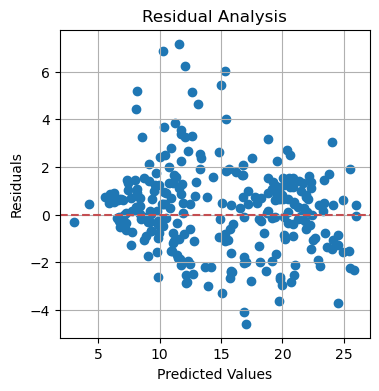

In [364]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(4, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()